# Detailed EDA on Expanded Drug Interaction Dataset

In [8]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_excel("C:/Users/ranuc/Downloads/expanded_drug_interaction_dataset.xlsx")

# Display basic info
print("Dataset Shape:", df.shape)
print("\nColumn Types:\n", df.dtypes)

# First few rows
df.head()


Dataset Shape: (7500, 14)

Column Types:
 Drug_A                       object
Drug_B                       object
Level                        object
Mechanism_of_Interaction     object
Interaction_Outcome          object
Severity_Score                int64
Common_Adverse_Effects       object
Black_Box_Warning            object
Metabolic_Pathway            object
Half_Life_A                   int64
Half_Life_B                   int64
Reported_Cases                int64
Hospitalization_Rate        float64
Mortality_Rate              float64
dtype: object


,Drug_A,Drug_B,Level,Mechanism_of_Interaction,Interaction_Outcome,Severity_Score,Common_Adverse_Effects,Black_Box_Warning,Metabolic_Pathway,Half_Life_A,Half_Life_B,Reported_Cases,Hospitalization_Rate,Mortality_Rate
0,Rifampin,Grapefruit Juice,Major,Inhibits clearance,Decreased thyroid hormone levels,2,Lactic acidosis,Yes,P-gp,12,25,422,30.5,10.7
1,Clopidogrel,Calcium Carbonate,Moderate,Inhibits clearance,Reduced antiplatelet effect,2,Hypothyroidism,Yes,OCT2,23,45,906,15.3,9.2
2,Ciprofloxacin,Cimetidine,Minor,Inhibits metabolism,Severe hypotension,3,Hypothyroidism,Yes,CYP2C19,10,40,323,47.5,14.5
3,Lisinopril,Tizanidine,Major,Inhibits metabolism,Decreased thyroid hormone levels,2,Muscle breakdown,No,OCT2,8,45,558,41.8,2.7
4,Warfarin,Grapefruit Juice,Moderate,Inhibits clearance,Statin toxicity,2,Blood clot risk,No,CYP3A4,5,30,752,42.3,6.8


In [9]:

# Summary statistics
df.describe(include='all')


,Drug_A,Drug_B,Level,Mechanism_of_Interaction,Interaction_Outcome,Severity_Score,Common_Adverse_Effects,Black_Box_Warning,Metabolic_Pathway,Half_Life_A,Half_Life_B,Reported_Cases,Hospitalization_Rate,Mortality_Rate
count,7500,7500,7500,7500,7500,7500.000000,7500,7500,7500,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000
unique,19,20,3,9,10,NaN,10,2,5,NaN,NaN,NaN,NaN,NaN
top,Ciprofloxacin,Calcium Carbonate,Major,Inhibits metabolism,Increased bleeding risk,NaN,Severe sedation,Yes,OCT2,NaN,NaN,NaN,NaN,NaN
freq,760,658,2549,1327,781,NaN,776,3769,1548,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,3.016667,NaN,NaN,NaN,24.484667,24.631333,527.184800,25.604987,7.589200
std,NaN,NaN,NaN,NaN,NaN,1.407072,NaN,NaN,NaN,13.190862,13.171784,271.699323,14.221137,4.296805
min,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,2.000000,2.000000,50.000000,1.000000,0.100000
25%,NaN,NaN,NaN,NaN,NaN,2.000000,NaN,NaN,NaN,13.000000,13.000000,292.000000,13.300000,3.900000
50%,NaN,NaN,NaN,NaN,NaN,3.000000,NaN,NaN,NaN,24.000000,25.000000,529.000000,25.750000,7.700000
75%,NaN,NaN,NaN,NaN,NaN,4.000000,NaN,NaN,NaN,36.000000,36.000000,761.000000,38.100000,11.300000


In [10]:

# Missing values
missing = df.isnull().sum()
missing[missing > 0]


Series([], dtype: int64)

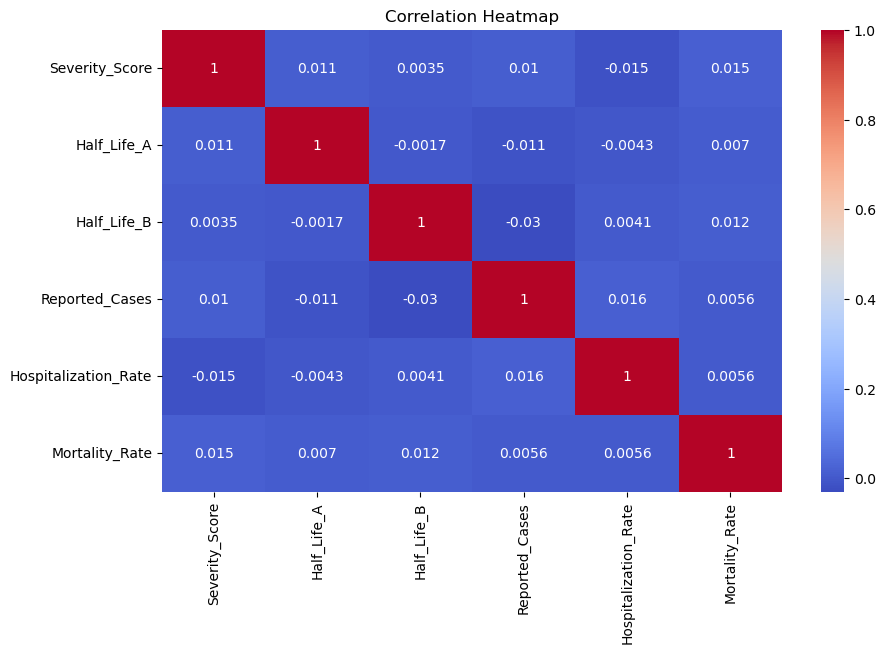

In [11]:

# Correlation heatmap for numeric columns
numeric_df = df.select_dtypes(include=['float64', 'int64'])
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


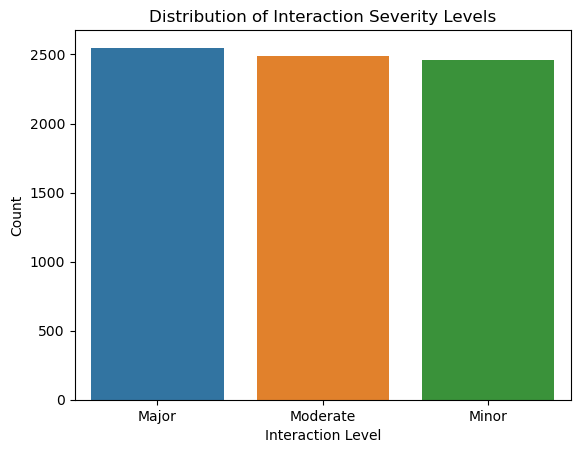

In [12]:

# Distribution of interaction levels
sns.countplot(x='Level', data=df)
plt.title('Distribution of Interaction Severity Levels')
plt.xlabel('Interaction Level')
plt.ylabel('Count')
plt.show()


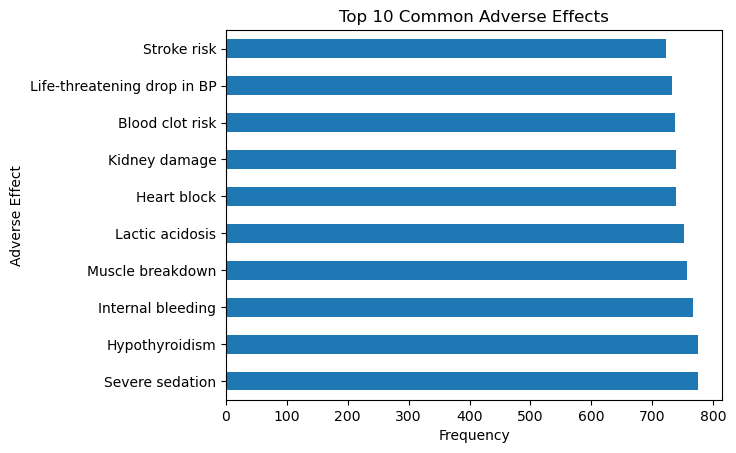

In [13]:

# Top 10 common adverse effects
df['Common_Adverse_Effects'].value_counts().head(10).plot(kind='barh')
plt.title('Top 10 Common Adverse Effects')
plt.xlabel('Frequency')
plt.ylabel('Adverse Effect')
plt.show()


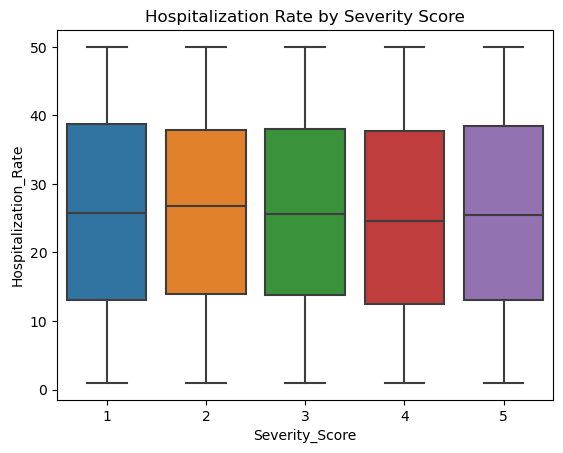

In [14]:

# Boxplot: Severity vs Hospitalization Rate
sns.boxplot(x='Severity_Score', y='Hospitalization_Rate', data=df)
plt.title('Hospitalization Rate by Severity Score')
plt.show()


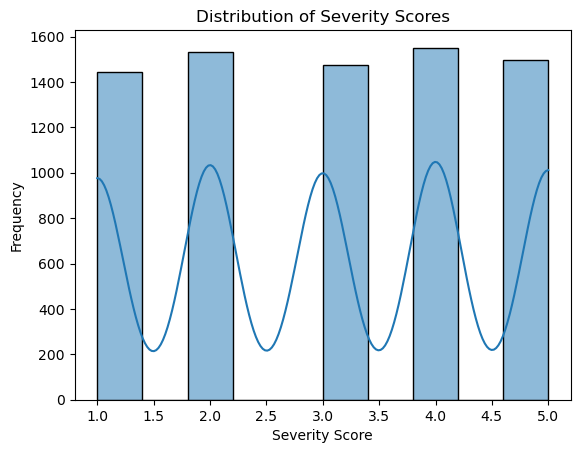

In [15]:

# Severity Score Distribution
sns.histplot(df['Severity_Score'], kde=True, bins=10)
plt.title('Distribution of Severity Scores')
plt.xlabel('Severity Score')
plt.ylabel('Frequency')
plt.show()


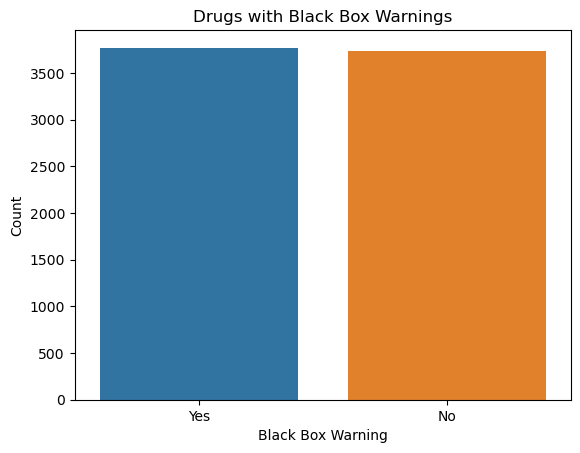

In [16]:

# Black Box Warning Distribution
sns.countplot(x='Black_Box_Warning', data=df)
plt.title('Drugs with Black Box Warnings')
plt.xlabel('Black Box Warning')
plt.ylabel('Count')
plt.show()


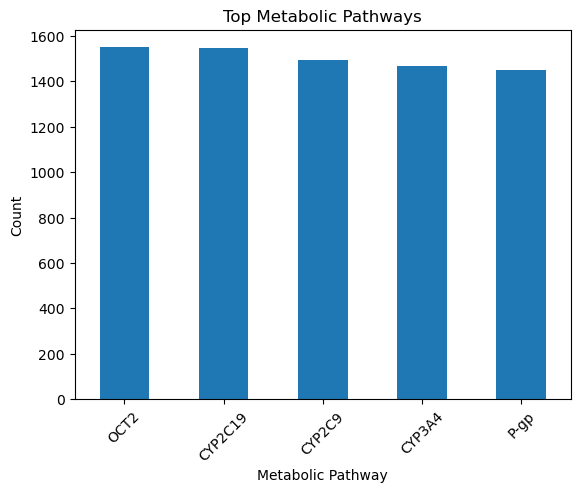

In [17]:

# Most Common Metabolic Pathways
df['Metabolic_Pathway'].value_counts().head(10).plot(kind='bar')
plt.title('Top Metabolic Pathways')
plt.xlabel('Metabolic Pathway')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


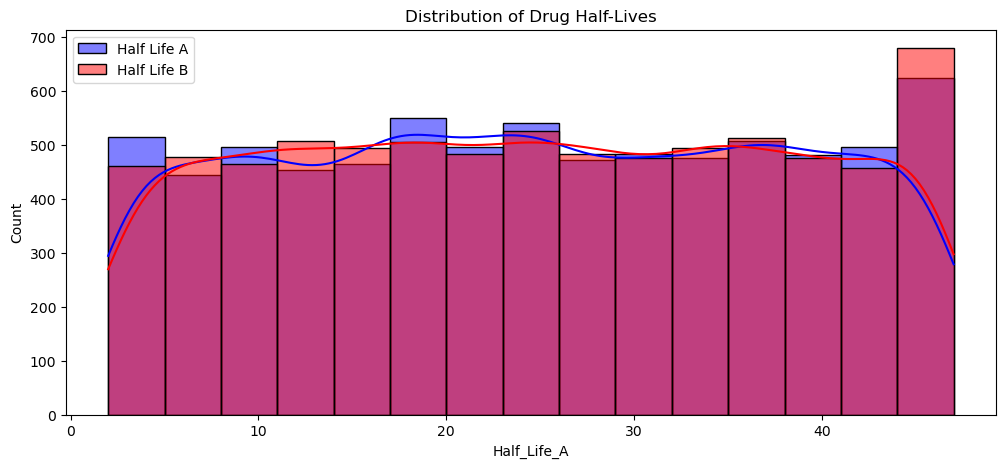

In [18]:

# Half-Life Distribution Comparison
plt.figure(figsize=(12,5))
sns.histplot(df['Half_Life_A'], color='blue', label='Half Life A', kde=True, bins=15, alpha=0.5)
sns.histplot(df['Half_Life_B'], color='red', label='Half Life B', kde=True, bins=15, alpha=0.5)
plt.title('Distribution of Drug Half-Lives')
plt.legend()
plt.show()


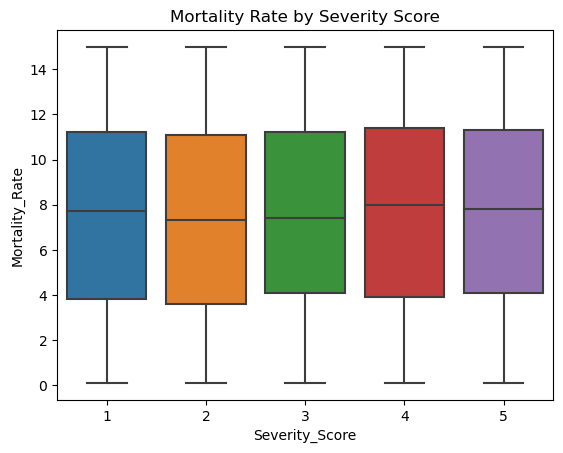

In [19]:

# Mortality Rate vs Severity
sns.boxplot(x='Severity_Score', y='Mortality_Rate', data=df)
plt.title('Mortality Rate by Severity Score')
plt.show()


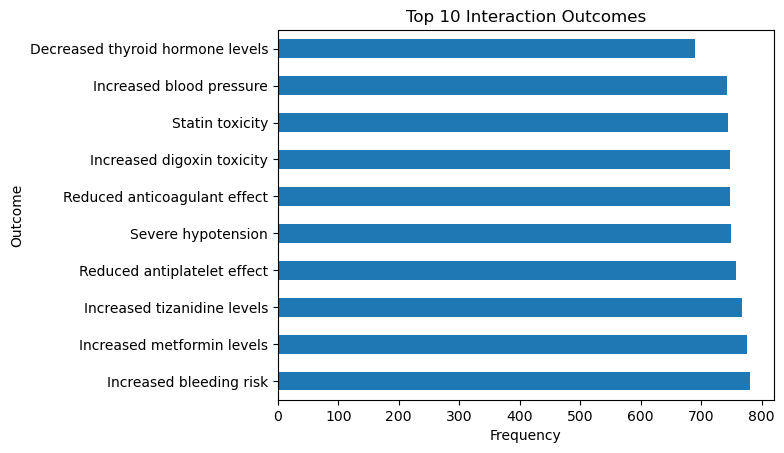

In [20]:

# Most Common Interaction Outcomes
df['Interaction_Outcome'].value_counts().head(10).plot(kind='barh')
plt.title('Top 10 Interaction Outcomes')
plt.xlabel('Frequency')
plt.ylabel('Outcome')
plt.show()
